In [1]:
#Data Set Characteristics:Optical recognition of handwritten digits dataset

#Number of Instances:5620

#Number of Attributes:64

#Attribute Information:8x8 image of integer pixels in the range 0..16

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print('Image Data Shape', digits.data.shape)

Image Data Shape (1797, 64)


In [3]:
# Print to show there are 1797 labels (integers from 0–9)
print('Label Data Shape', digits.target.shape)

Label Data Shape (1797,)


In [4]:
import numpy as np 

In [5]:
import matplotlib.pyplot as plt

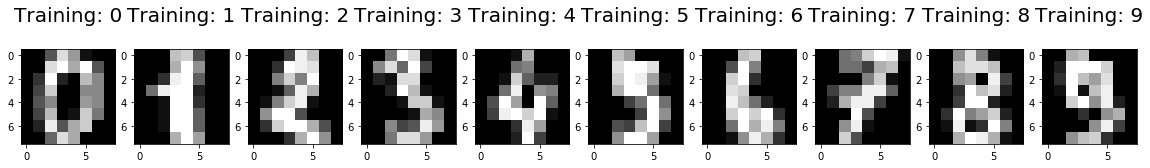

In [6]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)

In [8]:
print(x_train.shape)

(1437, 64)


In [9]:
print(x_test.shape)

(360, 64)


In [10]:
print(y_train.shape)

(1437,)


In [11]:
print(y_test.shape)

(360,)


In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(multi_class='ovr',solver='liblinear')

In [14]:
logisticRegr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
predictions = logisticRegr.predict(x_test)

In [17]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.95


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [19]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  1  0  3  0]
 [ 0  0 34  2  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  1  0  0  1  0  0 37  0  0]
 [ 0  2  1  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  0  2 37]]


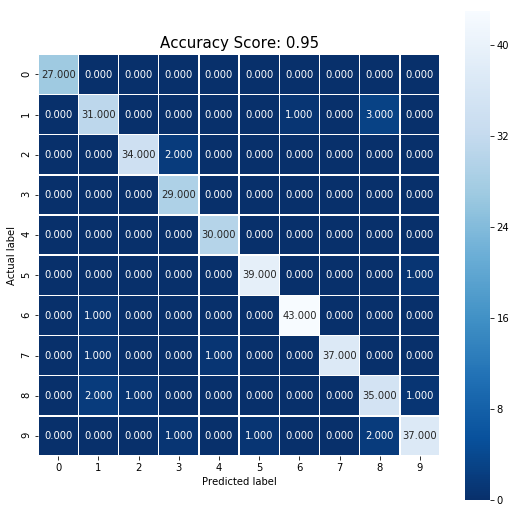

In [20]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

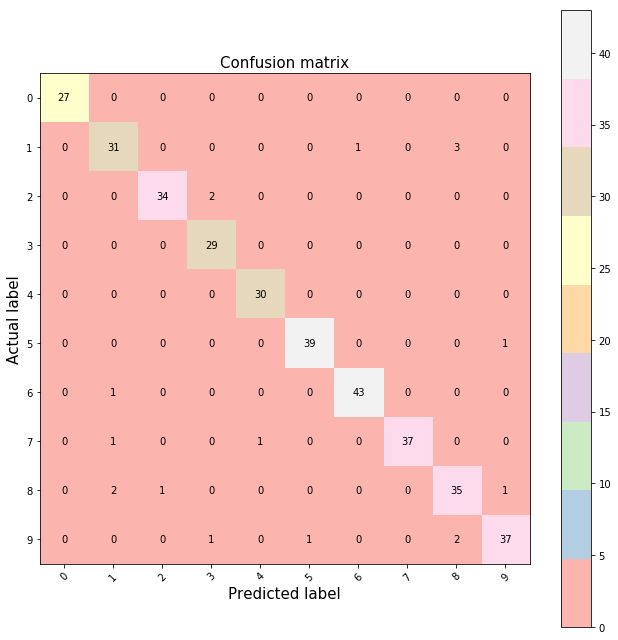

In [21]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                      horizontalalignment='center',
                      verticalalignment='center')